In [1]:
# Necessary imports for data checking and visualization
import numpy as np                 # model arrays
import pandas as pd                # DataFrames
import matplotlib.pyplot as plt    # building plots
import seaborn as sns              # Plotting help
import os                          # accessing the operating system

In [2]:
# Make sure all columns are displayed when using dataframe
pd.set_option('display.max_columns', None)

In [3]:
# Relative paths used since assumption is that user is in root directory of forked Git repo.
well_data = pd.read_csv("wellData.csv")      # load the well data in
daily_data = pd.read_csv("dailyData.csv")    # load the daily data in
solution_data = pd.read_csv("solution.csv")  # load the solution data in
solution_data["Fail in 30 days"] = 0                       # Initialize solutions with 0
solution_data = solution_data.rename(columns={"Fail in 30 days": "Failed"})

In [4]:
# Preview well data
well_data.head(2)

,Unnamed: 0,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail
0,0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR
1,1,29,ESP_3,ESP,8982.09,0,6.440650,NaN,NaN,NaN,NaN,2.789395,PUMP,MOTOR


In [5]:
# Preview daily data
daily_data.head(2)

,OIL,GAS,WATER,ARTIFICIAL_LIFT,DOWN_TIME_HOURS,ESP Data - Drive Current,ESP Data - Drive Voltage,ESP Data - Intake Pressure,ESP Data - Motor Temperature Shutdown Setpoint,ESP Data - Motor Winding Temperature,ESP Data - Output Frequency,ESP Data - Vibration X,Startup_Count,Oil_Intake,Water_Intake,Gas_Intake,Liquid_Intake,Gas_Saturation_at_Intake,Gas_Separator_Efficiency,Gas_through_Annulus_Intake,Gas_through_ESP_Intake,Gas_through_Annulus,Gas_through_ESP,Pb_ESP,Discharge_Pressure,ESP_Fluid,Gas_Saturation_at_Discharge,Pump_Delta_Pressure,Pump_Average_Pressure,Gas_Saturation_in_Pump,Pump_Power,Drive_Power,Power_Ratio,Power_Difference,ESP_Temperature,Lower_Limit,AL_Key,Well_ID
0,615.154601,650.447788,526.488655,ESP,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP_2,345
1,1224.193640,1232.455787,809.414685,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ESP_2,345


In [6]:
# Preview the solution data
solution_data.head(2)

,Well_ID,AL_Key,Failed
0,327,ESP_1,0
1,125,ESP_2,0


In [7]:
# Combine all data into one dataframe
combined_data = pd.merge(pd.merge(well_data, daily_data, on=["Well_ID", "AL_Key"], how="left"), 
                         solution_data, on=["Well_ID", "AL_Key"], how="left")
combined_data["Failed"] = combined_data["Failed"].replace(np.nan, 1)
combined_data = combined_data.drop(columns=["Unnamed: 0"])
combined_data.head(2)

,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail,OIL,GAS,WATER,ARTIFICIAL_LIFT,DOWN_TIME_HOURS,ESP Data - Drive Current,ESP Data - Drive Voltage,ESP Data - Intake Pressure,ESP Data - Motor Temperature Shutdown Setpoint,ESP Data - Motor Winding Temperature,ESP Data - Output Frequency,ESP Data - Vibration X,Startup_Count,Oil_Intake,Water_Intake,Gas_Intake,Liquid_Intake,Gas_Saturation_at_Intake,Gas_Separator_Efficiency,Gas_through_Annulus_Intake,Gas_through_ESP_Intake,Gas_through_Annulus,Gas_through_ESP,Pb_ESP,Discharge_Pressure,ESP_Fluid,Gas_Saturation_at_Discharge,Pump_Delta_Pressure,Pump_Average_Pressure,Gas_Saturation_in_Pump,Pump_Power,Drive_Power,Power_Ratio,Power_Difference,ESP_Temperature,Lower_Limit,Failed
0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,615.154601,650.447788,526.488655,ESP,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,1224.193640,1232.455787,809.414685,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [8]:
# Backfill NaN values in OIL, GAS, and Water columns
combined_data["OIL"].fillna(method="bfill", inplace=True)
combined_data["GAS"].fillna(method="bfill", inplace=True)
combined_data["WATER"].fillna(method="bfill", inplace=True)


In [9]:
# Insert new ratios and features in dataframe
combined_data.insert(15, "GAS/OIL", combined_data["GAS"] / combined_data["OIL"])
combined_data.insert(16, "GAS/FLUID", combined_data["GAS"] / (combined_data["OIL"] + combined_data["WATER"]))
combined_data.insert(17, "SLOPE_GAS/OIL", combined_data["GAS/OIL"].diff())

In [10]:
# Creates a dataframe with only the data for the wells that haven't failed
solution_data = combined_data[combined_data["Failed"]==0]
solution_data.head(2)

,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail,OIL,GAS,GAS/OIL,GAS/FLUID,SLOPE_GAS/OIL,WATER,ARTIFICIAL_LIFT,DOWN_TIME_HOURS,ESP Data - Drive Current,ESP Data - Drive Voltage,ESP Data - Intake Pressure,ESP Data - Motor Temperature Shutdown Setpoint,ESP Data - Motor Winding Temperature,ESP Data - Output Frequency,ESP Data - Vibration X,Startup_Count,Oil_Intake,Water_Intake,Gas_Intake,Liquid_Intake,Gas_Saturation_at_Intake,Gas_Separator_Efficiency,Gas_through_Annulus_Intake,Gas_through_ESP_Intake,Gas_through_Annulus,Gas_through_ESP,Pb_ESP,Discharge_Pressure,ESP_Fluid,Gas_Saturation_at_Discharge,Pump_Delta_Pressure,Pump_Average_Pressure,Gas_Saturation_in_Pump,Pump_Power,Drive_Power,Power_Ratio,Power_Difference,ESP_Temperature,Lower_Limit,Failed
838,327,ESP_1,ESP,8876.37,0,5.669751,NaN,NaN,NaN,NaN,0.48168,ELECTRICAL,UNKNOWN,178.181226,145.721524,0.817828,0.448434,-1.071360,146.775146,ESP,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
839,327,ESP_1,ESP,8876.37,0,5.669751,NaN,NaN,NaN,NaN,0.48168,ELECTRICAL,UNKNOWN,1270.565335,813.464403,0.640238,0.316639,-0.177589,1298.498026,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [11]:
# Make dataframe for failed pumps
failed_data = combined_data[combined_data["Failed"]==1]
failed_data.head(2)


,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail,OIL,GAS,GAS/OIL,GAS/FLUID,SLOPE_GAS/OIL,WATER,ARTIFICIAL_LIFT,DOWN_TIME_HOURS,ESP Data - Drive Current,ESP Data - Drive Voltage,ESP Data - Intake Pressure,ESP Data - Motor Temperature Shutdown Setpoint,ESP Data - Motor Winding Temperature,ESP Data - Output Frequency,ESP Data - Vibration X,Startup_Count,Oil_Intake,Water_Intake,Gas_Intake,Liquid_Intake,Gas_Saturation_at_Intake,Gas_Separator_Efficiency,Gas_through_Annulus_Intake,Gas_through_ESP_Intake,Gas_through_Annulus,Gas_through_ESP,Pb_ESP,Discharge_Pressure,ESP_Fluid,Gas_Saturation_at_Discharge,Pump_Delta_Pressure,Pump_Average_Pressure,Gas_Saturation_in_Pump,Pump_Power,Drive_Power,Power_Ratio,Power_Difference,ESP_Temperature,Lower_Limit,Failed
0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,615.154601,650.447788,1.057373,0.569747,NaN,526.488655,ESP,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,1224.193640,1232.455787,1.006749,0.606044,-0.050624,809.414685,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


['ESP_Motor_Frequency_Rating', 'ESP_Motor_Current_Rating', 'ESP_Motor_Voltage_Rating', 'ESP_Motor_Power_Rating'] were missing at least 50.0% of their data


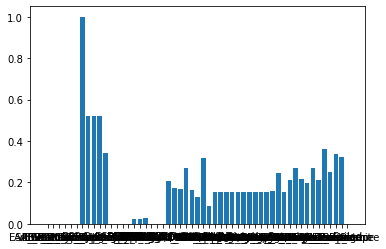

In [12]:
# Compute the completeness histogram for a given dataset
def completeness(df, cutoff=0.75):
    df_temp = df.copy(deep=True)                 # make a deep copy of the DataFrame
    df_bool = df_temp.isnull()
    features = list(df_bool.columns)
    percent_missing = []
    past_cutoff = []
    for feature in features:
        num_missing = df_bool[feature].sum()
        proportion_missing = df_bool[feature].sum() / len(df_bool)
        percent_missing.append(proportion_missing)
        if proportion_missing >= cutoff:
            past_cutoff.append(feature)
        # print(f'{feature}: {proportion_missing:.4f}')
    plt.bar(features, percent_missing)
    print(f'{past_cutoff} were missing at least {cutoff*100}% of their data')
completeness(solution_data, 0.5)


In [13]:
# Calculate the (spearman) correlation between all features in a dataframe.
def correlation(df, cutoff=0.75):
    corr = df.corr(method='spearman')
    correlated = []
    inversely_correlated = []
    for feature in corr:
        for feature2 in corr:
            correlation = corr[feature][feature2]
            if str(feature) == str(feature2):
                pass
            elif correlation >= cutoff:
                correlated.append((feature, feature2))
            elif correlation <= -cutoff:
                inversely_correlated.append((feature, feature2))
    print(f'Items listed here: {correlated} are correlated by a coefficient of at least {cutoff}')
    print('-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print(f'Items listed here: {inversely_correlated} are inversely correlated by a coefficient of at greatest -{cutoff}')
correlation(combined_data)

Items listed here: [('ESP_Motor_Voltage_Rating', 'ESP_Motor_Power_Rating'), ('ESP_Motor_Voltage_Rating', 'Lower_Limit'), ('ESP_Motor_Power_Rating', 'ESP_Motor_Voltage_Rating'), ('OIL', 'Oil_Intake'), ('OIL', 'Liquid_Intake'), ('OIL', 'Gas_through_ESP'), ('OIL', 'ESP_Fluid'), ('GAS', 'Gas_through_ESP'), ('GAS/OIL', 'GAS/FLUID'), ('GAS/OIL', 'Gas_Saturation_at_Intake'), ('GAS/FLUID', 'GAS/OIL'), ('GAS/FLUID', 'Gas_Saturation_at_Intake'), ('GAS/FLUID', 'Gas_through_ESP_Intake'), ('GAS/FLUID', 'Gas_Saturation_in_Pump'), ('WATER', 'Water_Intake'), ('WATER', 'Liquid_Intake'), ('WATER', 'Pump_Power'), ('ESP Data - Drive Current', 'Drive_Power'), ('ESP Data - Drive Voltage', 'ESP Data - Output Frequency'), ('ESP Data - Output Frequency', 'ESP Data - Drive Voltage'), ('Oil_Intake', 'OIL'), ('Oil_Intake', 'Liquid_Intake'), ('Oil_Intake', 'Gas_through_ESP'), ('Oil_Intake', 'ESP_Fluid'), ('Water_Intake', 'WATER'), ('Water_Intake', 'Liquid_Intake'), ('Water_Intake', 'Pump_Power'), ('Gas_Intake', 'G

In [14]:
# # Create data completeness histogram using the solution data

# # CREDIT PYRCZ LATER -- HIS CODE
# df_temp = solution_data.copy(deep=True)                 # make a deep copy of the DataFrame

# df_bool = df_temp.isnull()                              # true is value, false if NaN
# #df_bool = df_bool.set_index(df_temp.pop('UWI'))        # set the index / feature for the heat map y column
# heat = sns.heatmap(df_bool, cmap=['r','w'], annot=False, fmt='.0f',cbar=False,linecolor='black',linewidth=0.001) # make the binary heat map, no bins
# heat.set_xticklabels(heat.get_xticklabels(), rotation=90, fontsize=8)
# heat.set_yticklabels(heat.get_yticklabels(), rotation=0, fontsize=8)
 
# heat.set_title('Data Completeness Heatmap',fontsize=16); heat.set_xlabel('Feature',fontsize=12); heat.set_ylabel('Sample (Index)',fontsize=12)

# plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=3, wspace=0.2, hspace=0.2) # plot formatting
# plt.show()

In [15]:
# Create a matrix with our prioritized features
matrix = pd.DataFrame()
matrix = matrix.assign(Well_ID=combined_data["Well_ID"],
              AL_Key=combined_data["AL_Key"],
              AL_Bottom_Depth=combined_data["AL_Bottom_Depth"],
              DLS_Critical=combined_data["DLS_Critical"],
              DLS_at_Set_Depth=combined_data["DLS_at_Set_Depth"],
              Failed=combined_data["Failed"])


In [16]:
matrix.head(2)

,Well_ID,AL_Key,AL_Bottom_Depth,DLS_Critical,DLS_at_Set_Depth,Failed
0,345,ESP_2,9056.67,5.323174,1.713554,1.0
1,345,ESP_2,9056.67,5.323174,1.713554,1.0


In [17]:
# Simplest model first
# Add gas fluid ratio
# Keep: Dogleg at critical point, Well_ID, AL_Key, Bottom_Depth
# Drop: Artificial lift type, all ratings, drop failure types, Pump_Stages

# Dynamic:
# Add: Gas fluid ratio, Gas oil diff
# Keep: Well_ID, AL_Key, Pump Power, Gas over Oil, Gas Fluid, Vibration, Cumulative Oil, Gas oil diff 
# Drop: Oil Intage, Water Intake, Gas Intake, Artificial Lift Type, do correlation

In [18]:
# Most essential data to include in a minimum viable prototype
min_viable = combined_data.drop(columns=['Artificial_Lift_Type',
       'AL_Bottom_Depth', 'ESP_Pump_Stages',
       'ESP_Motor_Frequency_Rating', 'ESP_Motor_Current_Rating',
       'ESP_Motor_Voltage_Rating', 'ESP_Motor_Power_Rating',
       'DLS_at_Set_Depth', 'OIL', 'GAS', 'WATER', 'ARTIFICIAL_LIFT',
       'DOWN_TIME_HOURS', 'ESP Data - Drive Current',
       'ESP Data - Drive Voltage', 'ESP Data - Intake Pressure',
       'ESP Data - Motor Temperature Shutdown Setpoint',
       'ESP Data - Motor Winding Temperature', 'ESP Data - Output Frequency',
       'Startup_Count', 'Oil_Intake', 'Water_Intake',
       'Gas_Intake', 'Liquid_Intake', 'Gas_Saturation_at_Intake',
       'Gas_Separator_Efficiency', 'Gas_through_Annulus_Intake',
       'Gas_through_ESP_Intake', 'Gas_through_Annulus', 'Gas_through_ESP',
       'Pb_ESP', 'Discharge_Pressure', 'ESP_Fluid',
       'Gas_Saturation_at_Discharge', 'Pump_Delta_Pressure',
       'Pump_Average_Pressure', 'Gas_Saturation_in_Pump',
       'Drive_Power', 'Power_Ratio', 'Power_Difference', 'ESP_Temperature',
       'Lower_Limit', 'Failed'])
min_viable = min_viable[min_viable.AL_Key != "ESP_4"]
print(min_viable.head())

   Well_ID AL_Key  DLS_Critical Failure_Type Failure_Type_Detail   GAS/OIL  \
0      345  ESP_2      5.323174   ELECTRICAL               MOTOR  1.057373   
1      345  ESP_2      5.323174   ELECTRICAL               MOTOR  1.006749   
2      345  ESP_2      5.323174   ELECTRICAL               MOTOR  1.038996   
3      345  ESP_2      5.323174   ELECTRICAL               MOTOR  0.904599   
4      345  ESP_2      5.323174   ELECTRICAL               MOTOR  1.272905   

   GAS/FLUID  SLOPE_GAS/OIL  ESP Data - Vibration X  Pump_Power  
0   0.569747            NaN                     NaN         NaN  
1   0.606044      -0.050624                     NaN         NaN  
2   0.624853       0.032247                     NaN         NaN  
3   0.519628      -0.134397                     NaN         NaN  
4   0.617628       0.368307                     NaN         NaN  


[] were missing at least 50.0% of their data


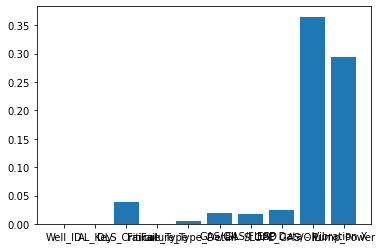

In [19]:
completeness(min_viable, 0.5)

In [20]:
well_data["DLS_Critical"].fillna(well_data["DLS_Critical"].mean(), inplace=True)
well_data.head()

,Unnamed: 0,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail
0,0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR
1,1,29,ESP_3,ESP,8982.09,0,6.440650,NaN,NaN,NaN,NaN,2.789395,PUMP,MOTOR
2,2,327,ESP_1,ESP,8876.37,0,5.669751,NaN,NaN,NaN,NaN,0.481680,ELECTRICAL,UNKNOWN
3,3,71,ESP_1,ESP,8930.11,0,5.614798,NaN,NaN,NaN,NaN,0.842038,ELECTRICAL,UNKNOWN
4,4,125,ESP_2,ESP,8616.41,348,26.061750,NaN,NaN,NaN,NaN,NaN,ELECTRICAL,PENETRATOR


In [21]:
# Function to separate a feature by time intervals
def separate_intervals(dataset, feature):
    grouped_data=combined_data.groupby(["Well_ID","AL_Key"])
    array_life=np.array(grouped_data.size())
    mega_matrix=np.array(grouped_data)
    test_array=np.array(dataset) # Get the Well_ID
    list_sort=[]
    list_fail=[]
    for i in range (0,len(mega_matrix)):
        flag=0
        for k in range(0,len(test_array)):        
            if mega_matrix[i][0][0] == test_array[k][0] and mega_matrix[i][0][1] == test_array[k][1]:
                list_sort.append(i)
                flag=1            
        if flag==0:
            list_fail.append(i)
    mega_s=mega_matrix[list_sort]
    mega_s_life=array_life[list_sort]

    
    mega_f=mega_matrix[list_fail]
    mega_f_life=array_life[list_fail]



    old_folks=[]

    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        senior=overall_time-int((overall_time*0.1).round(0))
        alpha=mega_f[i][1][senior:overall_time][feature].diff().mean()
        old_folks.append(alpha)

    army=[]
    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        start=overall_time-int((overall_time*0.6).round(0))
        end=overall_time-int((overall_time*0.4).round(0))
        soldier=mega_f[i][1][start:end][feature].diff().mean()
        army.append(soldier)
    print(old_folks)
    print("HERE")
    print(army)
    return([old_folks, army])
separate_intervals(min_viable, "OIL")

C:\Users\Richard\AppData\Local\Temp\ipykernel_17992\390499769.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mega_matrix=np.array(grouped_data)


[-0.26460529000000016, -0.2040226618421053]
HERE
[-0.3970143639534882, 0.04407199601307206]


[[-0.26460529000000016, -0.2040226618421053],
 [-0.3970143639534882, 0.04407199601307206]]

In [22]:
separate_intervals = separate_intervals(min_viable, "OIL")
print(separate_intervals)

C:\Users\Richard\AppData\Local\Temp\ipykernel_17992\390499769.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mega_matrix=np.array(grouped_data)


[-0.26460529000000016, -0.2040226618421053]
HERE
[-0.3970143639534882, 0.04407199601307206]
[[-0.26460529000000016, -0.2040226618421053], [-0.3970143639534882, 0.04407199601307206]]


In [23]:
min_viable.head()

,Well_ID,AL_Key,DLS_Critical,Failure_Type,Failure_Type_Detail,GAS/OIL,GAS/FLUID,SLOPE_GAS/OIL,ESP Data - Vibration X,Pump_Power
0,345,ESP_2,5.323174,ELECTRICAL,MOTOR,1.057373,0.569747,NaN,NaN,NaN
1,345,ESP_2,5.323174,ELECTRICAL,MOTOR,1.006749,0.606044,-0.050624,NaN,NaN
2,345,ESP_2,5.323174,ELECTRICAL,MOTOR,1.038996,0.624853,0.032247,NaN,NaN
3,345,ESP_2,5.323174,ELECTRICAL,MOTOR,0.904599,0.519628,-0.134397,NaN,NaN
4,345,ESP_2,5.323174,ELECTRICAL,MOTOR,1.272905,0.617628,0.368307,NaN,NaN


In [24]:
df= min_viable[min_viable["GAS/OIL"]<=10000]
print(df)


       Well_ID AL_Key  DLS_Critical Failure_Type Failure_Type_Detail  \
0          345  ESP_2      5.323174   ELECTRICAL               MOTOR   
1          345  ESP_2      5.323174   ELECTRICAL               MOTOR   
2          345  ESP_2      5.323174   ELECTRICAL               MOTOR   
3          345  ESP_2      5.323174   ELECTRICAL               MOTOR   
4          345  ESP_2      5.323174   ELECTRICAL               MOTOR   
...        ...    ...           ...          ...                 ...   
50051      142  ESP_1     14.108933       TUBING             MANDREL   
50052      142  ESP_1     14.108933       TUBING             MANDREL   
50053      142  ESP_1     14.108933       TUBING             MANDREL   
50054      142  ESP_1     14.108933       TUBING             MANDREL   
50055      142  ESP_1     14.108933       TUBING             MANDREL   

        GAS/OIL  GAS/FLUID  SLOPE_GAS/OIL  ESP Data - Vibration X  Pump_Power  
0      1.057373   0.569747            NaN              

In [26]:
# features_to_test = ["DLS_Critical", "GAS/OIL", "GAS/FLUID", "SLOPE_GAS/OIL",
#                     "ESP Data - Vibration X", "Pump_Power"]
# time_series_list = []
# for feature in features_to_test:
#     print("Feature:", feature)
#     separated_intervals = separate_intervals(min_viable, feature)
#     print(separate_intervals)
#     separated_intervals.insert(0, feature)
#     time_series_list.append(separated_intervals)
# print(time_series_list)

In [29]:
?


IPython -- An enhanced Interactive Python

IPython offers a fully compatible replacement for the standard Python
interpreter, with convenient shell features, special commands, command
history mechanism and output results caching.

At your system command line, type 'ipython -h' to see the command line
options available. This document only describes interactive features.

GETTING HELP
------------

Within IPython you have various way to access help:

  ?         -> Introduction and overview of IPython's features (this screen).
  object?   -> Details about 'object'.
  object??  -> More detailed, verbose information about 'object'.
  %quickref -> Quick reference of all IPython specific syntax and magics.
  help      -> Access Python's own help system.

If you are in terminal IPython you can quit this screen by pressing `q`.


MAIN FEATURES
-------------

* Access to the standard Python help with object docstrings and the Python
  manuals. Simply type 'help' (no quotes) to invoke it.

* Ma

In [30]:
combined_data.head()


,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail,OIL,GAS,GAS/OIL,GAS/FLUID,SLOPE_GAS/OIL,WATER,ARTIFICIAL_LIFT,DOWN_TIME_HOURS,ESP Data - Drive Current,ESP Data - Drive Voltage,ESP Data - Intake Pressure,ESP Data - Motor Temperature Shutdown Setpoint,ESP Data - Motor Winding Temperature,ESP Data - Output Frequency,ESP Data - Vibration X,Startup_Count,Oil_Intake,Water_Intake,Gas_Intake,Liquid_Intake,Gas_Saturation_at_Intake,Gas_Separator_Efficiency,Gas_through_Annulus_Intake,Gas_through_ESP_Intake,Gas_through_Annulus,Gas_through_ESP,Pb_ESP,Discharge_Pressure,ESP_Fluid,Gas_Saturation_at_Discharge,Pump_Delta_Pressure,Pump_Average_Pressure,Gas_Saturation_in_Pump,Pump_Power,Drive_Power,Power_Ratio,Power_Difference,ESP_Temperature,Lower_Limit,Failed
0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,615.154601,650.447788,1.057373,0.569747,NaN,526.488655,ESP,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,1224.193640,1232.455787,1.006749,0.606044,-0.050624,809.414685,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,1007.769762,1047.068544,1.038996,0.624853,0.032247,667.933899,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,1514.641876,1370.143160,0.904599,0.519628,-0.134397,1122.137652,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,1089.741764,1387.138130,1.272905,0.617628,0.368307,1156.169599,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [31]:
    grouped_data=combined_data.groupby(["Well_ID","AL_Key"])
    array_life=np.array(grouped_data.size())
    mega_matrix=np.array(grouped_data)
    test_array=np.array(solution_data)
    list_sort=[]
    list_fail=[]
    for i in range (0,len(mega_matrix)):
        flag=0
        for k in range(0,len(test_array)):        
            if mega_matrix[i][0][0] == test_array[k][0] and mega_matrix[i][0][1] == test_array[k][1]:
                list_sort.append(i)
                flag=1            
        if flag==0:
            list_fail.append(i)
    mega_s=mega_matrix[list_sort]
    mega_s_life=array_life[list_sort]

    
    mega_f=mega_matrix[list_fail]
    mega_f_life=array_life[list_fail]


    old_folks=[]

    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        senior=overall_time-int((overall_time*0.1).round(0))
        alpha=mega_f[i][1][senior:overall_time]["OIL"].diff().mean()
        old_folks.append(alpha)

    army=[]
    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        start=overall_time-int((overall_time*0.6).round(0))
        end=overall_time-int((overall_time*0.4).round(0))
        soldier=mega_f[i][1][start:end]["OIL"].diff().mean()
        army.append(soldier)



C:\Users\Richard\AppData\Local\Temp\ipykernel_17992\1573831050.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mega_matrix=np.array(grouped_data)


In [32]:
grouped_data.head()

,Well_ID,AL_Key,Artificial_Lift_Type,AL_Bottom_Depth,ESP_Pump_Stages,DLS_Critical,ESP_Motor_Frequency_Rating,ESP_Motor_Current_Rating,ESP_Motor_Voltage_Rating,ESP_Motor_Power_Rating,DLS_at_Set_Depth,Failure_Type,Failure_Type_Detail,OIL,GAS,GAS/OIL,GAS/FLUID,SLOPE_GAS/OIL,WATER,ARTIFICIAL_LIFT,DOWN_TIME_HOURS,ESP Data - Drive Current,ESP Data - Drive Voltage,ESP Data - Intake Pressure,ESP Data - Motor Temperature Shutdown Setpoint,ESP Data - Motor Winding Temperature,ESP Data - Output Frequency,ESP Data - Vibration X,Startup_Count,Oil_Intake,Water_Intake,Gas_Intake,Liquid_Intake,Gas_Saturation_at_Intake,Gas_Separator_Efficiency,Gas_through_Annulus_Intake,Gas_through_ESP_Intake,Gas_through_Annulus,Gas_through_ESP,Pb_ESP,Discharge_Pressure,ESP_Fluid,Gas_Saturation_at_Discharge,Pump_Delta_Pressure,Pump_Average_Pressure,Gas_Saturation_in_Pump,Pump_Power,Drive_Power,Power_Ratio,Power_Difference,ESP_Temperature,Lower_Limit,Failed
0,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,615.154601,650.447788,1.057373,0.569747,NaN,526.488655,ESP,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,1224.193640,1232.455787,1.006749,0.606044,-0.050624,809.414685,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,1007.769762,1047.068544,1.038996,0.624853,0.032247,667.933899,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,1514.641876,1370.143160,0.904599,0.519628,-0.134397,1122.137652,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,345,ESP_2,ESP,9056.67,0,5.323174,NaN,NaN,NaN,NaN,1.713554,ELECTRICAL,MOTOR,1089.741764,1387.138130,1.272905,0.617628,0.368307,1156.169599,ESP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49629,142,ESP_1,ESP,8160.90,415,14.108933,NaN,NaN,NaN,NaN,NaN,TUBING,MANDREL,271.432311,241.303226,0.889000,0.889000,-1.429873,0.000000,ESP,0.0,291.981674,365.011858,3368.921864,240.0,173.897984,45.0,0.964871,1.0,465.704738,0.000000,0.0,465.704738,0.0,0.980697,0.0,0.0,0.0,241.303226,3004.191331,NaN,415.936253,0.583568,NaN,2078.075166,0.025795,NaN,106.576773,NaN,122.152520,NaN,600.0,1.0
49630,142,ESP_1,ESP,8160.90,415,14.108933,NaN,NaN,NaN,NaN,NaN,TUBING,MANDREL,325.627953,360.167573,1.106071,0.125071,0.217071,2554.077165,ESP,0.0,293.464907,365.023623,3308.879097,240.0,174.607327,45.0,0.920063,1.0,557.958062,2610.220165,0.0,3168.178227,0.0,0.588379,0.0,0.0,0.0,360.167573,3004.191331,4210.734346,3170.509254,NaN,901.855249,3759.806721,0.000000,41.474705,107.121624,0.430193,65.646919,165.947387,600.0,1.0
49631,142,ESP_1,ESP,8160.90,415,14.108933,NaN,NaN,NaN,NaN,NaN,TUBING,MANDREL,431.870515,424.447420,0.982812,0.137884,-0.123259,2646.412188,ESP,0.0,288.526331,365.000000,3200.902432,240.0,174.359743,45.0,0.920418,1.0,738.219857,2705.270259,0.0,3443.490116,0.0,0.548542,0.0,0.0,0.0,424.447420,3004.191331,3723.135330,3446.036135,0.000000,522.232898,3462.018881,0.000000,26.103665,105.312111,0.275411,79.208445,166.016450,600.0,1.0
49632,142,ESP_1,ESP,8160.90,415,14.108933,NaN,NaN,NaN,NaN,NaN,TUBING,MANDREL,449.806689,455.172405,1.011929,0.148293,0.029117,2619.605358,ESP,0.0,285.034942,365.000000,3136.822414,240.0,174.308729,45.0,0.879087,1.0,767.751391,2678.26

In [33]:
    old_folks=[]

    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        senior=overall_time-int((overall_time*0.1).round(0))
        alpha=mega_f[i][1][senior:overall_time]["OIL"].std()
        old_folks.append(alpha)



    army=[]
    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        start=overall_time-int((overall_time*0.6).round(0))
        end=overall_time-int((overall_time*0.4).round(0))
        soldier=mega_f[i][1][start:end]["OIL"].std()
        army.append(soldier)

        
print(max(old_folks))        
print(max(army))

406.06597426644936
948.4017372990184


In [34]:
    old_folks=[]

    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        senior=overall_time-int((overall_time*0.1).round(0))
        alpha=mega_f[i][1][senior:overall_time]["GAS/OIL"].diff().mean()
        old_folks.append(alpha)

    army=[]
    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        start=overall_time-int((overall_time*0.6).round(0))
        end=overall_time-int((overall_time*0.4).round(0))
        soldier=mega_f[i][1][start:end]["GAS/OIL"].diff().mean()
        army.append(soldier)

print(max(old_folks))        
print(max(army))



inf
inf


In [35]:
    old_folks=[]

    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        senior=overall_time-int((overall_time*0.1).round(0))
        alpha=mega_f[i][1][senior:overall_time]["GAS/OIL"].std()
        old_folks.append(alpha)

    army=[]
    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        start=overall_time-int((overall_time*0.6).round(0))
        end=overall_time-int((overall_time*0.4).round(0))
        soldier=mega_f[i][1][start:end]["GAS/OIL"].std()
        army.append(soldier)

In [36]:
    old_folks=[]

    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        senior=overall_time-int((overall_time*0.1).round(0))
        alpha=mega_f[i][1][senior:overall_time]["GAS/FLUID"].diff().mean()
        old_folks.append(alpha)

    army=[]
    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        start=overall_time-int((overall_time*0.6).round(0))
        end=overall_time-int((overall_time*0.4).round(0))
        soldier=mega_f[i][1][start:end]["GAS/FLUID"].diff().mean()
        army.append(soldier)
        
        

In [37]:
    old_folks=[]

    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        senior=overall_time-int((overall_time*0.1).round(0))
        alpha=mega_f[i][1][senior:overall_time]["GAS/FLUID"].std()
        old_folks.append(alpha)

    army=[]
    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        start=overall_time-int((overall_time*0.6).round(0))
        end=overall_time-int((overall_time*0.4).round(0))
        soldier=mega_f[i][1][start:end]["GAS/FLUID"].std()
        army.append(soldier)



In [38]:
    old_folks=[]

    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        senior=overall_time-int((overall_time*0.1).round(0))
        alpha=mega_f[i][1][senior:overall_time]["AL_Bottom_Depth"].mean()
        old_folks.append(alpha)

    army=[]
    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        start=overall_time-int((overall_time*0.6).round(0))
        end=overall_time-int((overall_time*0.4).round(0))
        soldier=mega_f[i][1][start:end]["AL_Bottom_Depth"].mean()
        army.append(soldier)
        


In [39]:
    old_folks=[]

    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        senior=overall_time-int((overall_time*0.1).round(0))
        alpha=mega_f[i][1][senior:overall_time]["DLS_Critical"].mean()
        old_folks.append(alpha)

    army=[]
    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        start=overall_time-int((overall_time*0.6).round(0))
        end=overall_time-int((overall_time*0.4).round(0))
        soldier=mega_f[i][1][start:end]["DLS_Critical"].mean()
        army.append(soldier)
        


In [40]:
    old_folks=[]

    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        senior=overall_time-int((overall_time*0.1).round(0))
        alpha=mega_f[i][1][senior:overall_time]["OIL"].mean()
        old_folks.append(alpha)

    army=[]
    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        start=overall_time-int((overall_time*0.6).round(0))
        end=overall_time-int((overall_time*0.4).round(0))
        soldier=mega_f[i][1][start:end]["DLS_Critical"].mean()
        army.append(soldier)
        


In [50]:
    old_folks=[]

    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        senior=overall_time-int((overall_time*0.1).round(0))
        alpha1=mega_f[i][1][senior:overall_time]["OIL"].sum()
        alpha2=mega_f[i][1][0:overall_time]["OIL"].sum()
        alpha3=alpha1/alpha2
        old_folks.append(alpha3)

    army=[]
    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        start=overall_time-int((overall_time*0.6).round(0))
        end=overall_time-int((overall_time*0.4).round(0))
        soldier1=mega_f[i][1][start:end]["OIL"].sum()
        soldier2=mega_f[i][1][0:end]["OIL"].sum()
        soldier3=soldier1/soldier2
        army.append(soldier3)
        

In [ ]:
    old_folks=[]

    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        senior=overall_time-int((overall_time*0.1).round(0))
        alpha=mega_f[i][1][senior:overall_time]["OIL"].diff().diff().mean()
        old_folks.append(alpha)

    army=[]
    for i in range (len(mega_f)):
        overall_time=mega_f_life[i]
        start=overall_time-int((overall_time*0.6).round(0))
        end=overall_time-int((overall_time*0.4).round(0))
        soldier=mega_f[i][1][start:end]["OIL"].diff().diff().mean()
        army.append(soldier)

